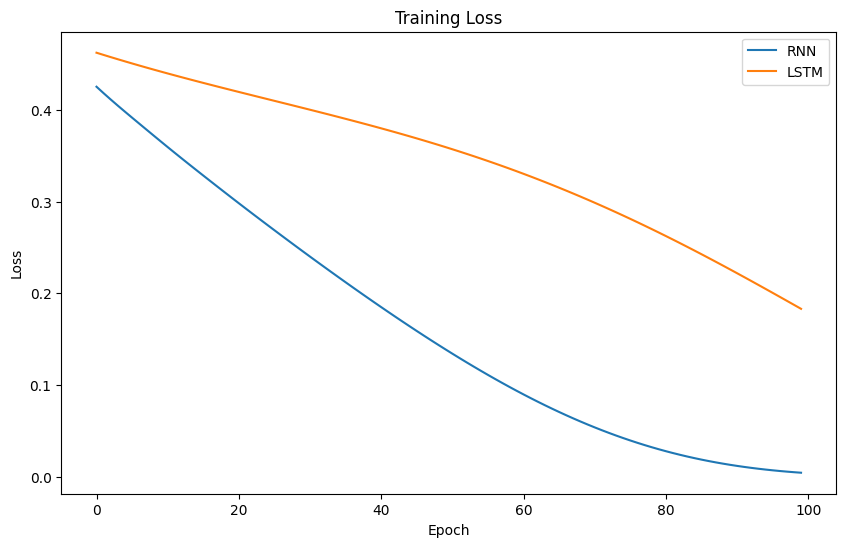

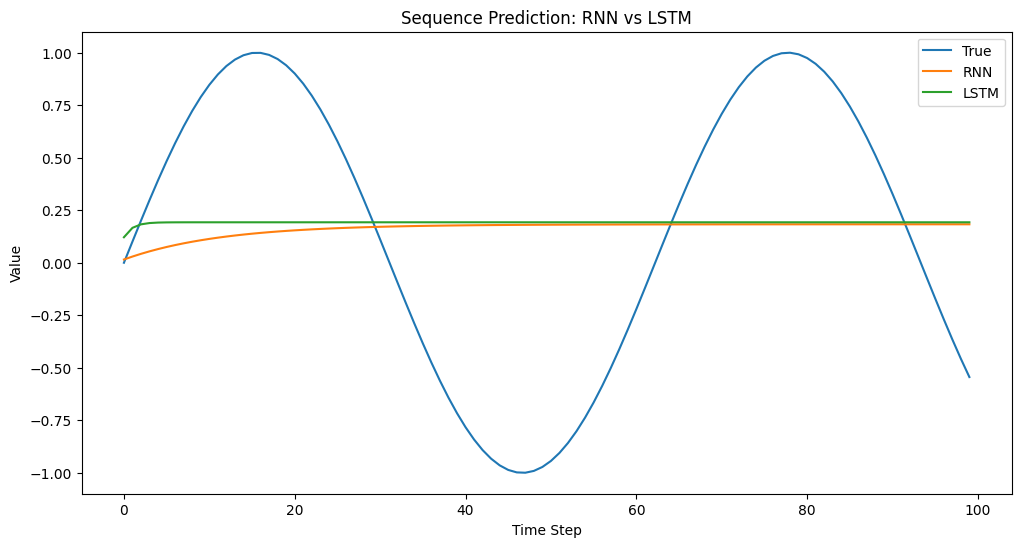

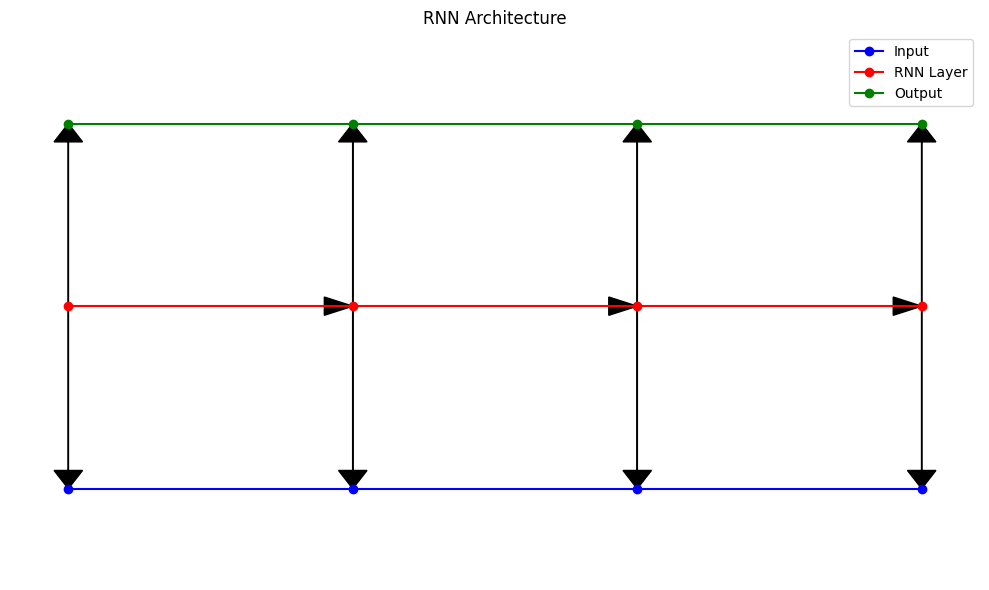

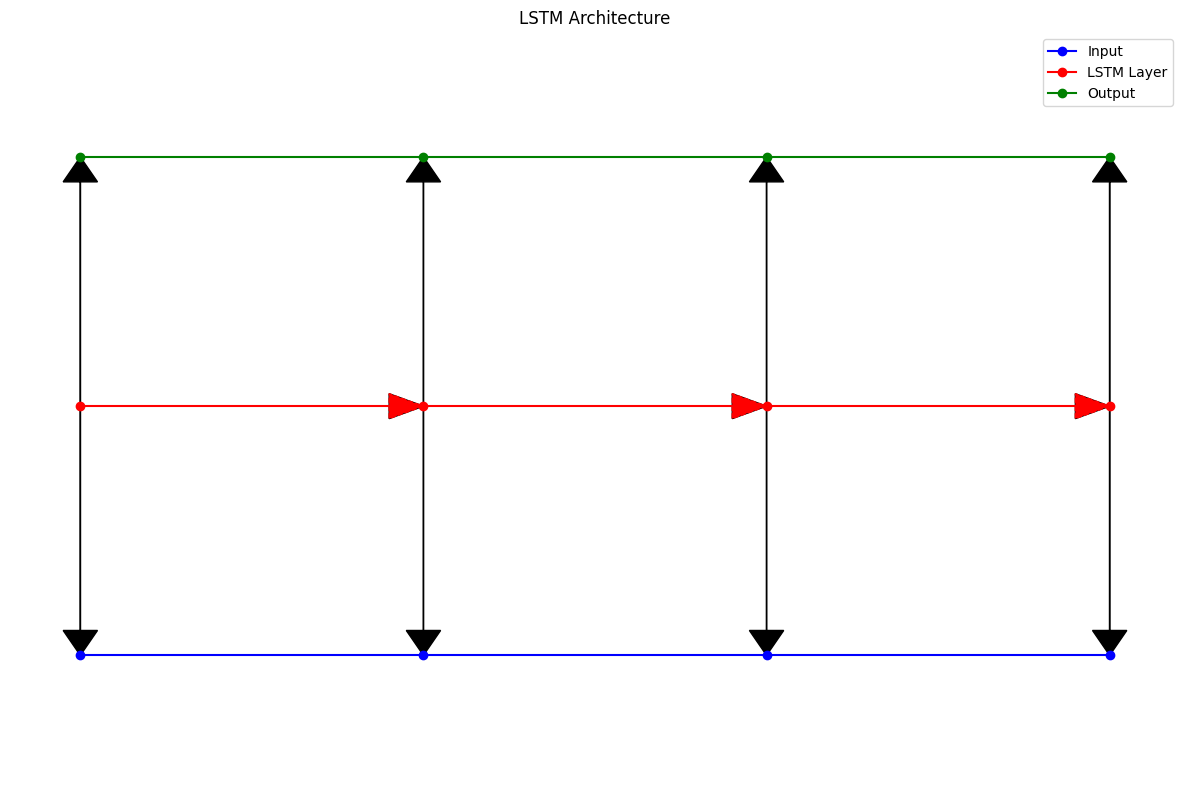

All visualizations have been saved as PNG files.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def plot_rnn_architecture():
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'bo-', label='Input')
    plt.plot([0, 1, 2, 3], [1, 1, 1, 1], 'ro-', label='RNN Layer')
    plt.plot([0, 1, 2, 3], [2, 2, 2, 2], 'go-', label='Output')
    for i in range(4):
        plt.arrow(i, 1, 0, -0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        plt.arrow(i, 1, 0, 0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if i < 3:
            plt.arrow(i, 1, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.ylim(-0.5, 2.5)
    plt.title('RNN Architecture')
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig('rnn_architecture.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_lstm_architecture():
    plt.figure(figsize=(12, 8))
    plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'bo-', label='Input')
    plt.plot([0, 1, 2, 3], [1, 1, 1, 1], 'ro-', label='LSTM Layer')
    plt.plot([0, 1, 2, 3], [2, 2, 2, 2], 'go-', label='Output')
    for i in range(4):
        plt.arrow(i, 1, 0, -0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        plt.arrow(i, 1, 0, 0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if i < 3:
            plt.arrow(i, 1, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
            plt.arrow(i, 1, 0.9, 0, head_width=0.1, head_length=0.1, fc='r', ec='r', linestyle='--')
    plt.ylim(-0.5, 2.5)
    plt.title('LSTM Architecture')
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig('lstm_architecture.png', dpi=300, bbox_inches='tight')
    plt.close()

def generate_sequence(length):
    return np.sin(np.linspace(0, 10, length))

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.linear(out[:, -1, :])
        return out

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

def train_model(model, X, y, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses

def predict_sequence(model, seed, length):
    model.eval()
    with torch.no_grad():
        predictions = []
        current = seed
        for _ in range(length):
            output = model(current.view(1, 1, 1))
            predictions.append(output.item())
            current = output
    return predictions

def main():
    # Generate sample data
    sequence = generate_sequence(1000)
    X = torch.FloatTensor(sequence[:-1]).view(-1, 1, 1)
    y = torch.FloatTensor(sequence[1:]).view(-1, 1)

    # Train RNN and LSTM models
    rnn_model = RNNModel(1, 64, 1)
    lstm_model = LSTMModel(1, 64, 1)

    rnn_losses = train_model(rnn_model, X, y)
    lstm_losses = train_model(lstm_model, X, y)

    # Plot training losses
    plt.figure(figsize=(10, 6))
    plt.plot(rnn_losses, label='RNN')
    plt.plot(lstm_losses, label='LSTM')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Compare RNN and LSTM performance
    test_sequence = generate_sequence(100)
    rnn_predictions = predict_sequence(rnn_model, torch.FloatTensor([test_sequence[0]]), 100)
    lstm_predictions = predict_sequence(lstm_model, torch.FloatTensor([test_sequence[0]]), 100)

    plt.figure(figsize=(12, 6))
    plt.plot(test_sequence, label='True')
    plt.plot(rnn_predictions, label='RNN')
    plt.plot(lstm_predictions, label='LSTM')
    plt.title('Sequence Prediction: RNN vs LSTM')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    plt.savefig('prediction_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Generate architecture diagrams
    plot_rnn_architecture()
    plot_lstm_architecture()

    print("All visualizations have been saved as PNG files.")

if __name__ == "__main__":
    main()

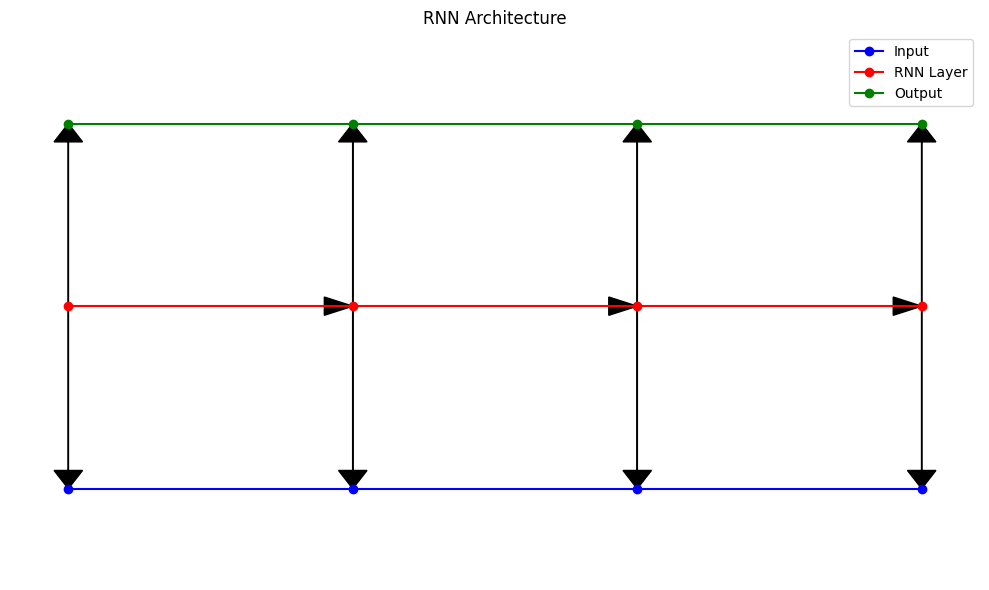

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Simple RNN layer
rnn_layer = nn.RNN(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
# Visualize RNN architecture
def plot_rnn_architecture():
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'bo-', label='Input')
    plt.plot([0, 1, 2, 3], [1, 1, 1, 1], 'ro-', label='RNN Layer')
    plt.plot([0, 1, 2, 3], [2, 2, 2, 2], 'go-', label='Output')
    for i in range(4):
        plt.arrow(i, 1, 0, -0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        plt.arrow(i, 1, 0, 0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if i < 3:
            plt.arrow(i, 1, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.ylim(-0.5, 2.5)
    plt.title('RNN Architecture')
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig('rnn_architecture.png', dpi=300, bbox_inches='tight')
    plt.close()
plot_rnn_architecture()

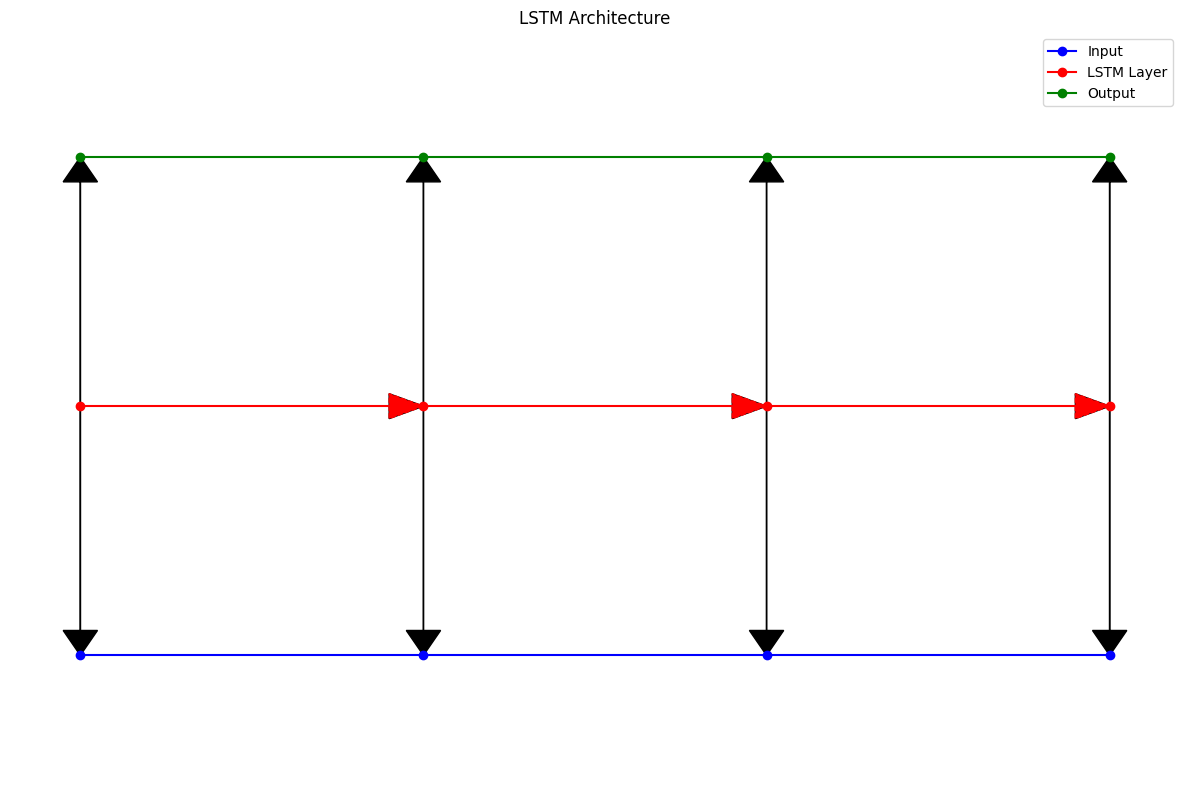

In [4]:
# LSTM layer
lstm_layer = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)

# Visualize LSTM architecture
def plot_lstm_architecture():
    plt.figure(figsize=(12, 8))
    plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'bo-', label='Input')
    plt.plot([0, 1, 2, 3], [1, 1, 1, 1], 'ro-', label='LSTM Layer')
    plt.plot([0, 1, 2, 3], [2, 2, 2, 2], 'go-', label='Output')
    for i in range(4):
        plt.arrow(i, 1, 0, -0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        plt.arrow(i, 1, 0, 0.9, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if i < 3:
            plt.arrow(i, 1, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
            plt.arrow(i, 1, 0.9, 0, head_width=0.1, head_length=0.1, fc='r', ec='r', linestyle='--')
    plt.ylim(-0.5, 2.5)
    plt.title('LSTM Architecture')
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig('lstm_architecture.png', dpi=300, bbox_inches='tight')
    plt.close()
plot_lstm_architecture()

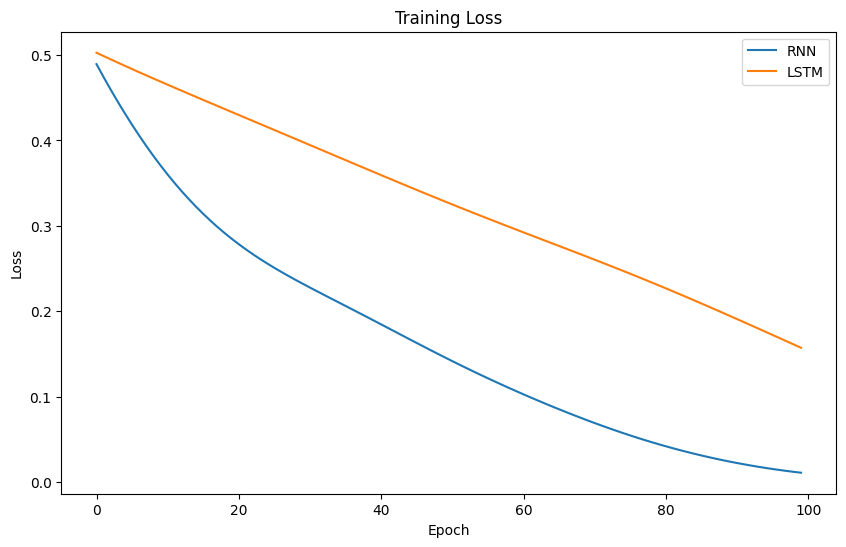

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Generate sample data
def generate_sequence(length):
    return np.sin(np.linspace(0, 10, length))
sequence = generate_sequence(1000)
X = torch.FloatTensor(sequence[:-1]).view(-1, 1, 1)
y = torch.FloatTensor(sequence[1:]).view(-1, 1)
# RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.linear(out[:, -1, :])
        return out
# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out
# Training function
def train_model(model, X, y, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses
# Train RNN and LSTM models
rnn_model = RNNModel(1, 64, 1)
lstm_model = LSTMModel(1, 64, 1)
rnn_losses = train_model(rnn_model, X, y)
lstm_losses = train_model(lstm_model, X, y)
# Plot training losses
plt.figure(figsize=(10, 6))
plt.plot(rnn_losses, label='RNN')
plt.plot(lstm_losses, label='LSTM')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
plt.close()

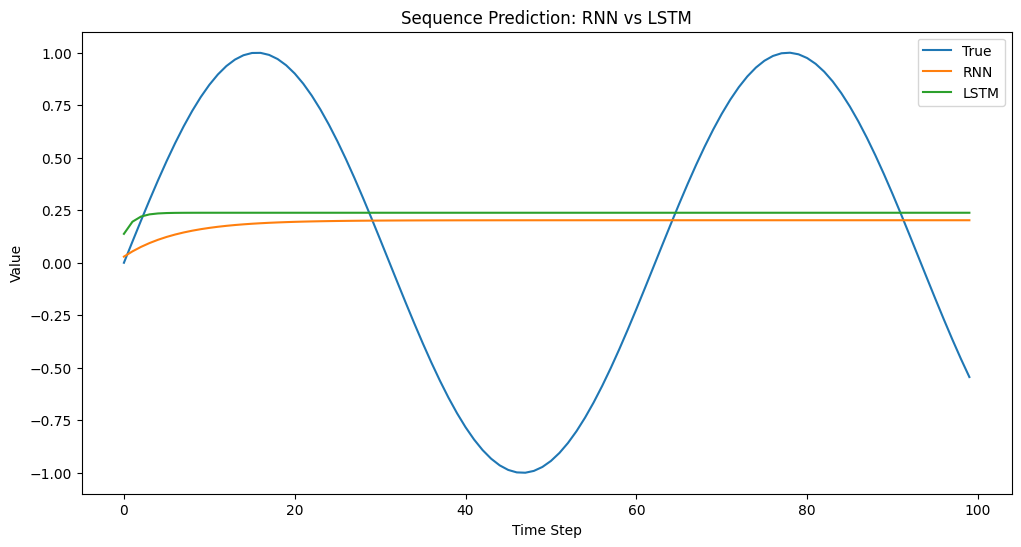

In [6]:
def predict_sequence(model, seed, length):
    model.eval()
    with torch.no_grad():
        predictions = []
        current = seed
        for _ in range(length):
            output = model(current.view(1, 1, 1))
            predictions.append(output.item())
            current = output
    return predictions

test_sequence = generate_sequence(100)
rnn_predictions = predict_sequence(rnn_model, torch.FloatTensor([test_sequence[0]]), 100)
lstm_predictions = predict_sequence(lstm_model, torch.FloatTensor([test_sequence[0]]), 100)
plt.figure(figsize=(12, 6))
plt.plot(test_sequence, label='True')
plt.plot(rnn_predictions, label='RNN')
plt.plot(lstm_predictions, label='LSTM')
plt.title('Sequence Prediction: RNN vs LSTM')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()
plt.savefig('prediction_comparison.png', dpi=300, bbox_inches='tight')
plt.close()